In [285]:
import os
import sys
import itertools
import bs4 as bs
import urllib.request

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [287]:
MAIN_DIR=os.getcwd()
DATA_DIR=os.path.join(MAIN_DIR,'data')
R_DATA_DIR=os.path.join(DATA_DIR,'raw_data')
N_DATA_DIR=os.path.join(DATA_DIR,'clean_data')

print(MAIN_DIR)
print(DATA_DIR)
print(R_DATA_DIR)
print(N_DATA_DIR)

/mnt/c/workspace/gametheory_oil_market
/mnt/c/workspace/gametheory_oil_market/data
/mnt/c/workspace/gametheory_oil_market/data/raw_data
/mnt/c/workspace/gametheory_oil_market/data/clean_data


In [290]:
# Setting for data downloading
# from_date='1960-01'
# end_date='2023-10'

# download OPEC price data

# source = urllib.request.urlopen('https://www.opec.org/basket/basketDayArchives.xml').read()
# soup = bs.BeautifulSoup(source,'xml')

crude_price_m = pd.read_csv(os.path.join(R_DATA_DIR,'Dubai_crude_data.csv'), index_col=0)
crude_price_y = pd.read_csv(os.path.join(R_DATA_DIR,'Long_crude_price_data.csv'), index_col=0)
crude_production_y = pd.read_csv(os.path.join(R_DATA_DIR,'OPEC_production_data.csv'), index_col=0)
OPEC_NOPEC_crude_production_y = pd.read_csv(os.path.join(R_DATA_DIR,'OPEC_NON_OPEC_production.csv'), index_col=0)
g20_cli_m = pd.read_csv(os.path.join(R_DATA_DIR,'CLI_G20_data.csv'), index_col=0)

In [293]:
# Data Pre-Processing

# crude_price.index=pd.to_datetime(crude_price.index)
# crude_price_monthly=crude_price.resample('1M').last()

crude_price_m.index=pd.to_datetime(crude_price_m.index)
crude_price_y.index=pd.to_datetime(crude_price_y.index)
crude_production_y.index=pd.to_datetime(crude_production_y.index)
OPEC_NOPEC_crude_production_y.index=pd.to_datetime(OPEC_NOPEC_crude_production_y.index)
g20_cli_m.index=pd.to_datetime(g20_cli_m.index)

crude_production_y = crude_production_y.fillna(0.0000)
OPEC_NOPEC_crude_production_y = OPEC_NOPEC_crude_production_y.fillna(0.0000)

# crude_price_y=crude_price_m.resample('1Y').last() 
g20_cli_y=g20_cli_m.resample('1Y').last()

begin_crude_price_m, end_crude_price_m = crude_price_m.index[0], crude_price_m.index[-1]
crude_price_m_datetime_index = pd.Series(pd.date_range(begin_crude_price_m, periods=len(crude_price_m), freq="M"))
crude_price_m.index=crude_price_m_datetime_index


In [294]:
OPEC_NOPEC=OPEC_NOPEC_crude_production_y.merge(crude_price_y, how='left', left_index=True, right_index=True)
OPEC_NOPEC['Market_Size'] = OPEC_NOPEC['Total']*OPEC_NOPEC['Price']
OPEC_NOPEC['Non-OPEC yoy'] = np.log(OPEC_NOPEC['Non-OPEC']/OPEC_NOPEC['Non-OPEC'].shift(1))
OPEC_NOPEC['OPEC yoy'] = np.log(OPEC_NOPEC['OPEC']/OPEC_NOPEC['OPEC'].shift(1))
OPEC_NOPEC['Non-OPEC yoy'] = np.log(OPEC_NOPEC['Non-OPEC']/OPEC_NOPEC['Non-OPEC'].shift(1))
OPEC_NOPEC['Price yoy'] = np.log(OPEC_NOPEC['Price']/OPEC_NOPEC['Price'].shift(1))
OPEC_NOPEC = OPEC_NOPEC.fillna(0)
OPEC_NOPEC['Price yoy adj'] = OPEC_NOPEC['Price yoy'] - OPEC_NOPEC['Price yoy'].mean()
OPEC_NOPEC['Price yoy adj'].iloc[0]=0.00000

OPEC_NOPEC

,Non-OPEC,OPEC,Total,Price,Market_Size,Non-OPEC yoy,OPEC yoy,Price yoy,Price yoy adj
Date,,,,,,,,,
1965-12-31,10232.295,7998.7876,18231.0826,2.86,5.214090e+04,0.000000,0.000000,0.000000,0.000000
1966-12-31,11001.895,8794.9160,19796.8110,2.88,5.701482e+04,0.072519,0.094884,0.006969,-0.053241
1967-12-31,11866.278,9372.1860,21238.4640,2.92,6.201631e+04,0.075633,0.063573,0.013793,-0.046416
1968-12-31,12715.343,10454.6880,23170.0310,2.94,6.811989e+04,0.069109,0.109304,0.006826,-0.053384
1969-12-31,13364.741,11575.5930,24940.3340,3.09,7.706563e+04,0.049811,0.101848,0.049762,-0.010448
1970-12-31,14413.325,13020.5590,27433.8840,3.18,8.723975e+04,0.075533,0.117631,0.028710,-0.031499
1971-12-31,14915.783,14085.0060,29000.7890,3.39,9.831267e+04,0.034267,0.078581,0.063949,0.003739
1972-12-31,15649.100,15000.8720,30649.9720,3.39,1.039034e+05,0.047993,0.062998,0.000000,-0.060210
1973-12-31,16423.064,17022.0600,33445.1240,3.89,1.301015e+05,0.048273,0.126402,0.137579,0.077370


In [295]:
# Average Crude oil production growth of OPEC is 1.46%  from 1965 to 2022
# Average Crude oil production growth of non-OPEC is 2.00%  from 1965 to 2022

OPEC_cooperate_betray_threshold = 0.0146
NOPEC_cooperate_betray_threshold = 0.0200

OPEC_NOPEC['OPEC_cooperate'] = 0
OPEC_NOPEC['NOPEC_cooperate'] = 0

for ind in OPEC_NOPEC.index:
    if OPEC_NOPEC.loc[ind,'Non-OPEC yoy'] == 0 or OPEC_NOPEC.loc[ind, 'OPEC yoy'] == 0:
        OPEC_NOPEC.loc[ind, 'OPEC_cooperate'], OPEC_NOPEC.loc[ind, 'NOPEC_cooperate'] = 1, 1
        
    else:
        if OPEC_NOPEC.loc[ind, 'Non-OPEC yoy'] < NOPEC_cooperate_betray_threshold:
            OPEC_NOPEC.loc[ind, 'NOPEC_cooperate'] = 1
        
        if OPEC_NOPEC.loc[ind, 'OPEC yoy'] < OPEC_cooperate_betray_threshold:
            OPEC_NOPEC.loc[ind,'OPEC_cooperate'] = 1

OPEC_NOPEC

,Non-OPEC,OPEC,Total,Price,Market_Size,Non-OPEC yoy,OPEC yoy,Price yoy,Price yoy adj,OPEC_cooperate,NOPEC_cooperate
Date,,,,,,,,,,,
1965-12-31,10232.295,7998.7876,18231.0826,2.86,5.214090e+04,0.000000,0.000000,0.000000,0.000000,1,1
1966-12-31,11001.895,8794.9160,19796.8110,2.88,5.701482e+04,0.072519,0.094884,0.006969,-0.053241,0,0
1967-12-31,11866.278,9372.1860,21238.4640,2.92,6.201631e+04,0.075633,0.063573,0.013793,-0.046416,0,0
1968-12-31,12715.343,10454.6880,23170.0310,2.94,6.811989e+04,0.069109,0.109304,0.006826,-0.053384,0,0
1969-12-31,13364.741,11575.5930,24940.3340,3.09,7.706563e+04,0.049811,0.101848,0.049762,-0.010448,0,0
1970-12-31,14413.325,13020.5590,27433.8840,3.18,8.723975e+04,0.075533,0.117631,0.028710,-0.031499,0,0
1971-12-31,14915.783,14085.0060,29000.7890,3.39,9.831267e+04,0.034267,0.078581,0.063949,0.003739,0,0
1972-12-31,15649.100,15000.8720,30649.9720,3.39,1.039034e+05,0.047993,0.062998,0.000000,-0.060210,0,0
1973-12-31,16423.064,17022.0600,33445.1240,3.89,1.301015e+05,0.048273,0.126402,0.137579,0.077370,0,0


In [296]:
crude_price_m.to_csv(os.path.join(N_DATA_DIR,'crude_price_m.csv'))
g20_cli_m.to_csv(os.path.join(N_DATA_DIR,'g20_cli_m.csv'))
crude_price_y.to_csv(os.path.join(N_DATA_DIR,'crude_price_y.csv'))
crude_production_y.to_csv(os.path.join(N_DATA_DIR,'crude_production_y.csv'))
OPEC_NOPEC.to_csv(os.path.join(N_DATA_DIR,'OPEC_NOPEC_crude_production_y.csv'))
g20_cli_y.to_csv(os.path.join(N_DATA_DIR,'g20_cli_y.csv'))

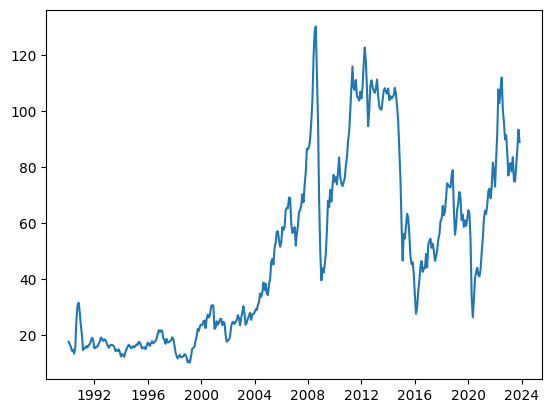

In [297]:
plt.plot(crude_price_m)

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

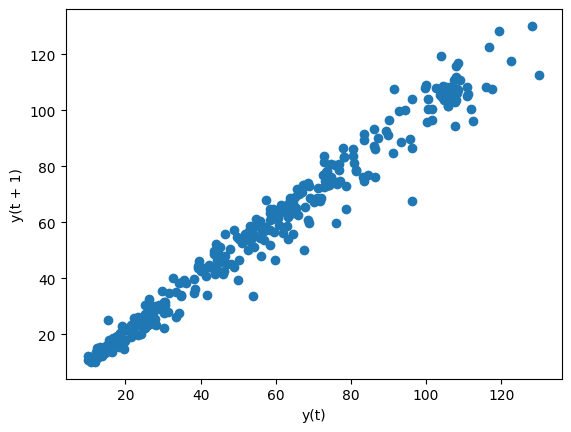

In [298]:
pd.plotting.lag_plot(crude_price_m, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

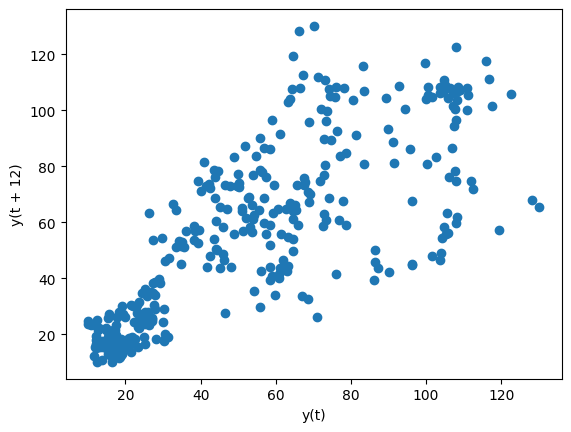

In [299]:
pd.plotting.lag_plot(crude_price_m, lag=12)